This file aims to get:
1. the boxplots of the distribution of factors
2. the radar charts of the advantages of each accommodation brand
3. table/dataframe and pie chart of top ten locations

In [2]:
import pandas as pd
import pickle
from plotnine import *
import numpy as np

In [5]:
raw_df = pd.read_pickle('pure number df')
raw_df['convenience'] = raw_df[['avg time to nearby convenience stores','avg time to nearby supermarkets','avg time to nearby restaurants']].mean(axis=1)
raw_df['transport'] = raw_df.apply(lambda row: min(row['avg time to nearby bus stops'], row['avg time to nearby underground station']), axis=1)
raw_df = raw_df.round(3)
raw_df['brand'] = raw_df['name'].apply(lambda i: 'Unite Students' if 'Unite Students' in i 
                                 else 'iQ' if 'iQ' in i 
                                 else 'Scape' if 'Scape' in i 
                                 else 'Urbanest' if 'Urbanest' in i 
                                 else 'Chapter' if 'Chapter' in i
                                 else None)
raw_df = raw_df.drop(raw_df.index[[10,77,32]])#drop rows that do not have the value of crimerate ranking


In [6]:
raw_df

,name,crime rate score,avg time to nearby convenience stores,avg time to nearby supermarkets,avg time to nearby restaurants,avg time to nearby bus stops,avg time to nearby underground station,avg time to nearby pharmacy,diversity,convenience,transport,brand
0,Urbanest Canal Reach,81.849,8.40,7.03,4.17,1.10,12.08,11.80,23,6.533,1.10,Urbanest
1,Urbanest Hoxton,82.494,2.55,2.72,3.87,0.02,5.58,7.32,51,3.047,0.02,Urbanest
2,Urbanest Westminster Bridge,97.250,4.37,3.70,2.68,2.10,6.35,5.90,53,3.583,2.10,Urbanest
3,Urbanest St Pancras,79.819,7.40,10.20,8.23,8.65,12.35,12.38,15,8.610,8.65,Urbanest
4,Urbanest City,97.384,2.60,5.55,1.87,1.05,4.67,11.07,57,3.340,1.05,Urbanest
...,...,...,...,...,...,...,...,...,...,...,...,...
72,Scape Bloomsbury,91.057,5.92,4.95,3.82,1.27,3.88,6.27,56,4.897,1.27,Scape
73,Scape Kings Cross,92.068,4.70,4.55,1.57,4.23,7.33,5.65,59,3.607,4.23,Scape
74,Scape Shoreditch,91.886,4.68,4.97,3.38,1.55,2.60,8.42,55,4.343,1.55,Scape
75,Scape Mile End,84.662,10.22,13.83,12.80,13.63,10.18,15.63,16,12.283,10.18,Scape


In [7]:
cr_rdf = raw_df[['crime rate score','brand']]

In [9]:
conve_rdf = raw_df[['convenience','brand']]
phar_rdf = raw_df[['avg time to nearby pharmacy','brand']]
div_rdf = raw_df[['diversity','brand']]
tran_rdf = raw_df[['transport','brand']]

d:\Anaconda\lib\site-packages\plotnine\layer.py:333: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.


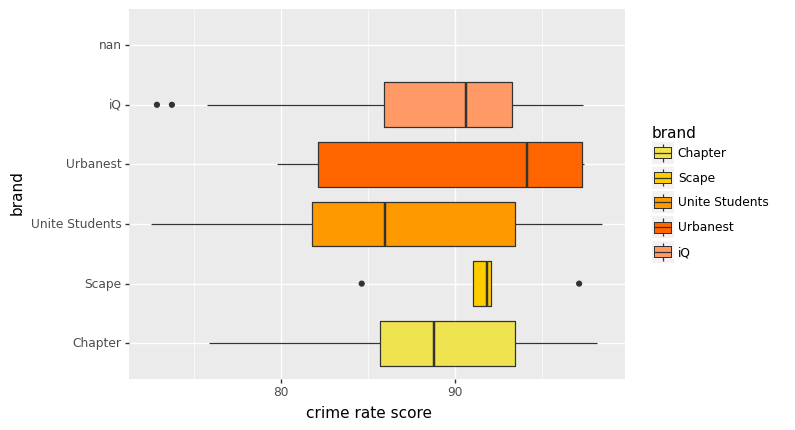

<ggplot: (112145582704)>

In [16]:
(
    ggplot(cr_rdf,aes(x='brand', y='crime rate score',fill ='brand'))
    +geom_boxplot()
    + labs(color = 'brand')
    +scale_fill_manual(values = ("#EFE350FF","#FFCC00","#FF9900","#FF6600","#FF9966"))
    +coord_flip()
)

d:\Anaconda\lib\site-packages\plotnine\layer.py:333: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.


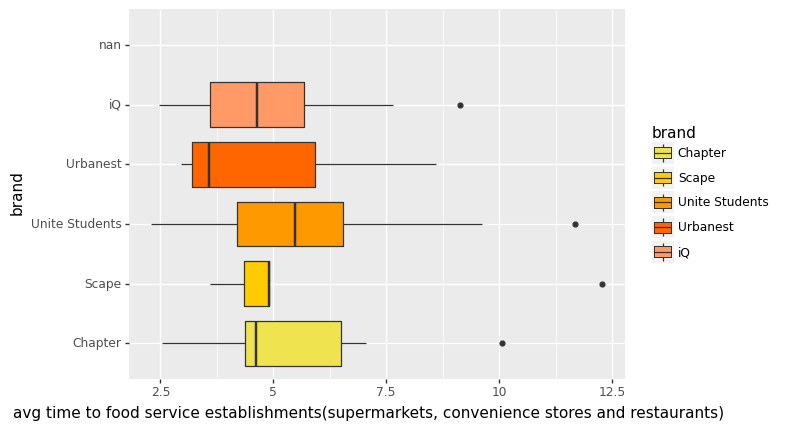

<ggplot: (112145940038)>

In [17]:
(
    ggplot(conve_rdf,aes(x='brand', y='convenience',fill ='brand'))
    +geom_boxplot()
    + labs(color = 'brand')
    +ylab('avg time to food service establishments(supermarkets, convenience stores and restaurants)')
    +scale_fill_manual(values = ("#EFE350FF","#FFCC00","#FF9900","#FF6600","#FF9966"))
    +coord_flip()
)

In [ ]:
phar_rdf = raw_df[['avg time to nearby pharmacy','brand']]
div_rdf = raw_df[['diversity','brand']]
tran_rdf = raw_df[['transport','brand']]

d:\Anaconda\lib\site-packages\plotnine\layer.py:333: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.


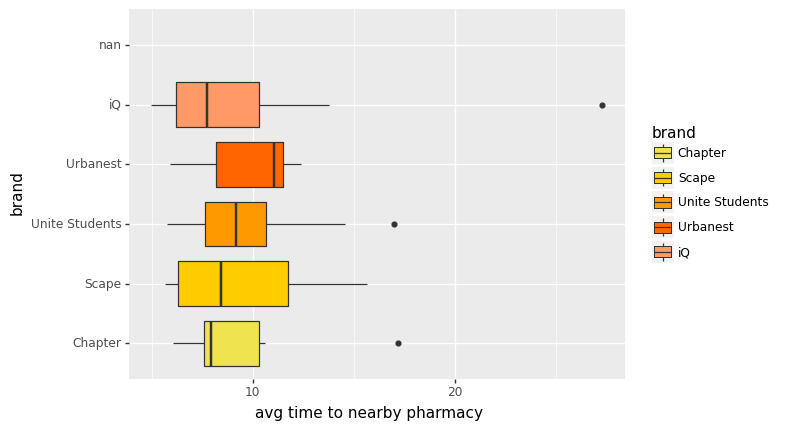

<ggplot: (112145557782)>

In [13]:
(
    ggplot(phar_rdf,aes(x='brand', y='avg time to nearby pharmacy',fill ='brand'))
    +geom_boxplot()
    + labs(color = 'brand')
    +scale_fill_manual(values = ("#EFE350FF","#FFCC00","#FF9900","#FF6600","#FF9966"))
    +coord_flip()
)

d:\Anaconda\lib\site-packages\plotnine\layer.py:333: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.


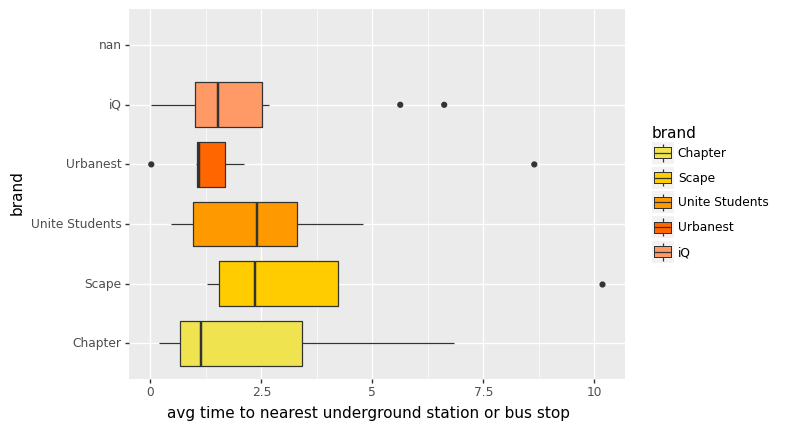

<ggplot: (112145795416)>

In [14]:
(
    ggplot(tran_rdf,aes(x='brand', y='transport',fill ='brand'))
    +geom_boxplot()
    + labs(color = 'brand')
    +ylab('avg time to nearest underground station or bus stop')
    +scale_fill_manual(values = ("#EFE350FF","#FFCC00","#FF9900","#FF6600","#FF9966"))
    +coord_flip()
)

d:\Anaconda\lib\site-packages\plotnine\layer.py:333: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.


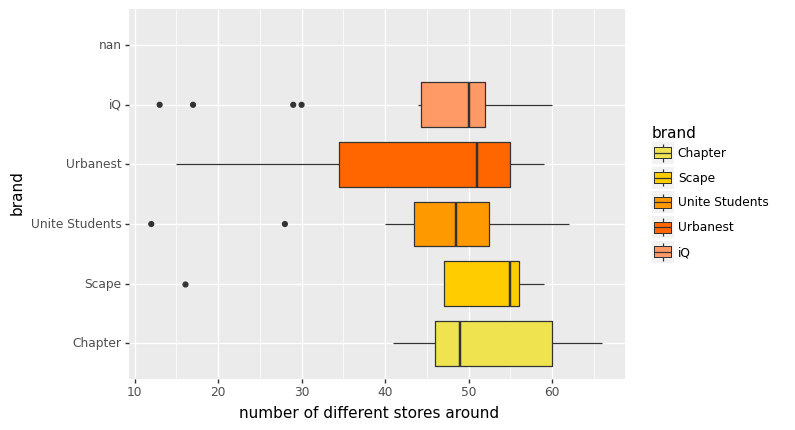

<ggplot: (112145947058)>

In [15]:
(
    ggplot(div_rdf,aes(x='brand', y='diversity',fill ='brand'))
    +geom_boxplot()
    + labs(color = 'brand')
    +ylab('number of different stores around')
    +scale_fill_manual(values = ("#EFE350FF","#FFCC00","#FF9900","#FF6600","#FF9966"))
    +coord_flip()
)

Then is the data involves our scoring system. This part use radar chart to show different brands' relative advantages.

In [20]:
import plotly_express as px

In [18]:
sdf = pd.read_pickle('scored_df')

In [36]:
order = ['crime rate score','transportation','convenience(pharmacy)','convenience(food & dairy products)','diversity','brand','total_score']
sdf = sdf[order]

In [37]:
grouped_s = sdf.groupby('brand')

In [38]:
iq_rdf = grouped_s.get_group('iQ')
us_rdf = grouped_s.get_group('Unite Students')
sc_rdf = grouped_s.get_group('Scape')
ub_rdf = grouped_s.get_group('Urbanest')
cp_rdf = grouped_s.get_group('Chapter')

In [47]:
def get_radar_chart(_df,type):
    def give_fig(_list):
        new_df = pd.DataFrame(dict(
        r=_list,
        theta = ['safety score','convenience(transportation)','convenience(pharmacy)',
             'convenience(food & dairy products)','diversity of surrounding shops']
        ))
        fig = px.line_polar(new_df, r='r', theta='theta', line_close=True)
        fig.update_traces(fill='toself')
        return fig.show()
    if type == 'mean':
        mean_list = _df.mean().drop('total_score').tolist()
        return give_fig(mean_list)        
    if type == 'median':
        median_list = _df.median().drop('total_score').tolist()
        return give_fig(median_list)

In [49]:
#iQ
#mean radar chart
get_radar_chart(iq_rdf,'mean')
#median radar chart
get_radar_chart(iq_rdf,'median')

C:\Users\keyue\AppData\Local\Temp\ipykernel_13280\2592238181.py:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

d:\Anaconda\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\keyue\AppData\Local\Temp\ipykernel_13280\2592238181.py:15: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

d:\Anaconda\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [50]:
#Unite Students
#mean radar chart
get_radar_chart(us_rdf,'mean')
#median radar chart
get_radar_chart(us_rdf,'median')

C:\Users\keyue\AppData\Local\Temp\ipykernel_13280\2592238181.py:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

d:\Anaconda\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\keyue\AppData\Local\Temp\ipykernel_13280\2592238181.py:15: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

d:\Anaconda\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [51]:
#Urbanest
#mean radar chart
get_radar_chart(ub_rdf,'mean')
#median radar chart
get_radar_chart(ub_rdf,'median')

C:\Users\keyue\AppData\Local\Temp\ipykernel_13280\2592238181.py:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

d:\Anaconda\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\keyue\AppData\Local\Temp\ipykernel_13280\2592238181.py:15: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

d:\Anaconda\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [52]:
#Chapter
#mean radar chart
get_radar_chart(cp_rdf,'mean')
#median radar chart
get_radar_chart(cp_rdf,'median')

C:\Users\keyue\AppData\Local\Temp\ipykernel_13280\2592238181.py:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

d:\Anaconda\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\keyue\AppData\Local\Temp\ipykernel_13280\2592238181.py:15: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

d:\Anaconda\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [53]:
#Scape
#mean radar chart
get_radar_chart(sc_rdf,'mean')
#median radar chart
get_radar_chart(sc_rdf,'median')

C:\Users\keyue\AppData\Local\Temp\ipykernel_13280\2592238181.py:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

d:\Anaconda\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\keyue\AppData\Local\Temp\ipykernel_13280\2592238181.py:15: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

d:\Anaconda\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



The part below uses bar charts to show the ranking of accommodation locations' total score

In [59]:
sdf['name'] = raw_df['name']
sdf = sdf.sort_values('total_score')

In [83]:
ranking = sdf[['name','total_score','brand']].sort_values('total_score',ascending = False).reset_index(drop=True)
ranking.index = ranking.index+1
top_ten = ranking[:10]

In [84]:
top_ten

,name,total_score,brand
1,Unite Students - Hayloft Point,4.619,Unite Students
2,iQ Student Accommodation Kingston,4.607,iQ
3,Unite Students - Julian Markham House,4.497,Unite Students
4,Urbanest Tower Bridge,4.475,Urbanest
5,Urbanest City,4.406,Urbanest
6,Urbanest Westminster Bridge,4.339,Urbanest
7,iQ Student Accommodation Highbury,4.312,iQ
8,Unite Students - Olympic Way,4.303,Unite Students
9,Chapter Spitalfields,4.300,Chapter
10,Unite Students - Angel Lane,4.271,Unite Students


In [101]:
import matplotlib.pyplot as plt

In [93]:
data

,group,value
0,Unite Students,4
1,iQ,2
2,Chapter,1
3,Urbanest,3


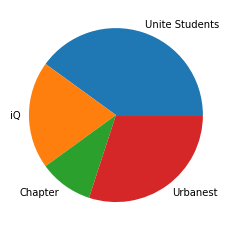

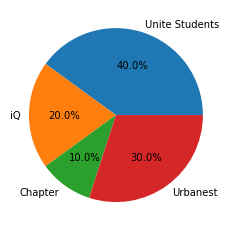

In [112]:
plt.pie(data["value"], labels = data["group"])
fig, ax = plt.subplots()
ax.pie(data["value"], labels=data["group"], autopct='%1.1f%%')
plt.show()

d:\Anaconda\lib\site-packages\plotnine\layer.py:391: PlotnineWarning:

position_stack : Removed 65 rows containing missing values.

d:\Anaconda\lib\site-packages\plotnine\layer.py:391: PlotnineWarning:

position_stack : Removed 65 rows containing missing values.



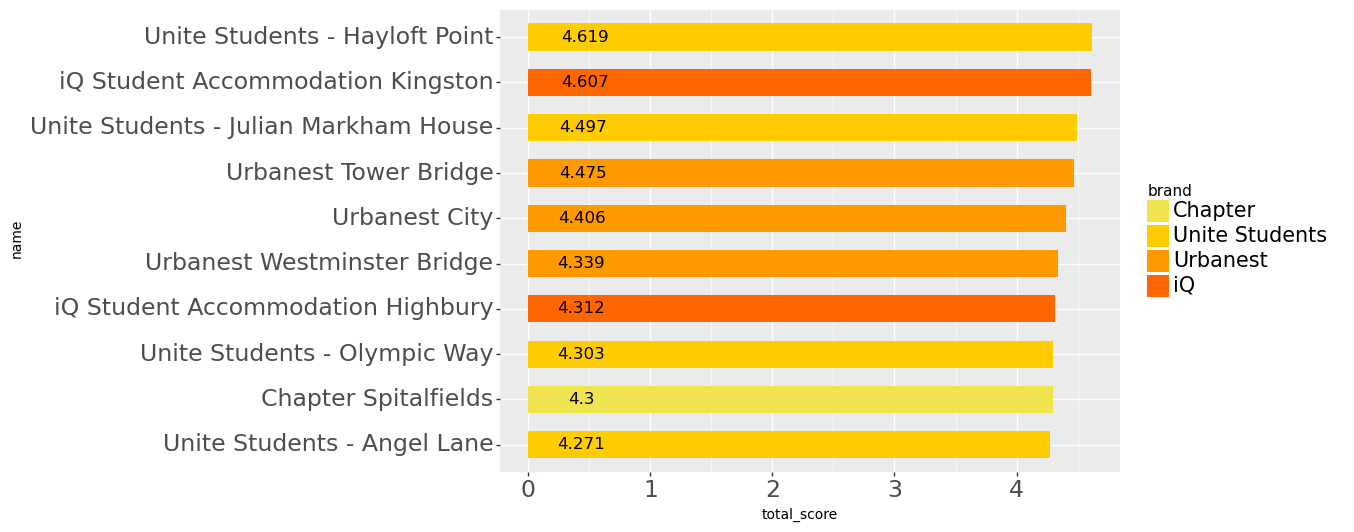

<ggplot: (112155771576)>

In [68]:
(ggplot(data=sdf,
        mapping=aes(x='name',y='total_score',fill = 'brand'))
    + geom_bar(stat = 'identity',width = 0.6)
    + coord_flip()
    +scale_x_discrete(limits=sdf['name'].tolist()[-10:])
    + theme(figure_size=(8,6),
            axis_text=element_text(size=17),
            axis_title=element_text(size=10),
            legend_text=element_text(size=15))
    +scale_fill_manual(values = ("#EFE350FF","#FFCC00","#FF9900","#FF6600","#FF9966"))
    + geom_text(aes(label='total_score'), size=12, position=position_stack(vjust=0.1)))

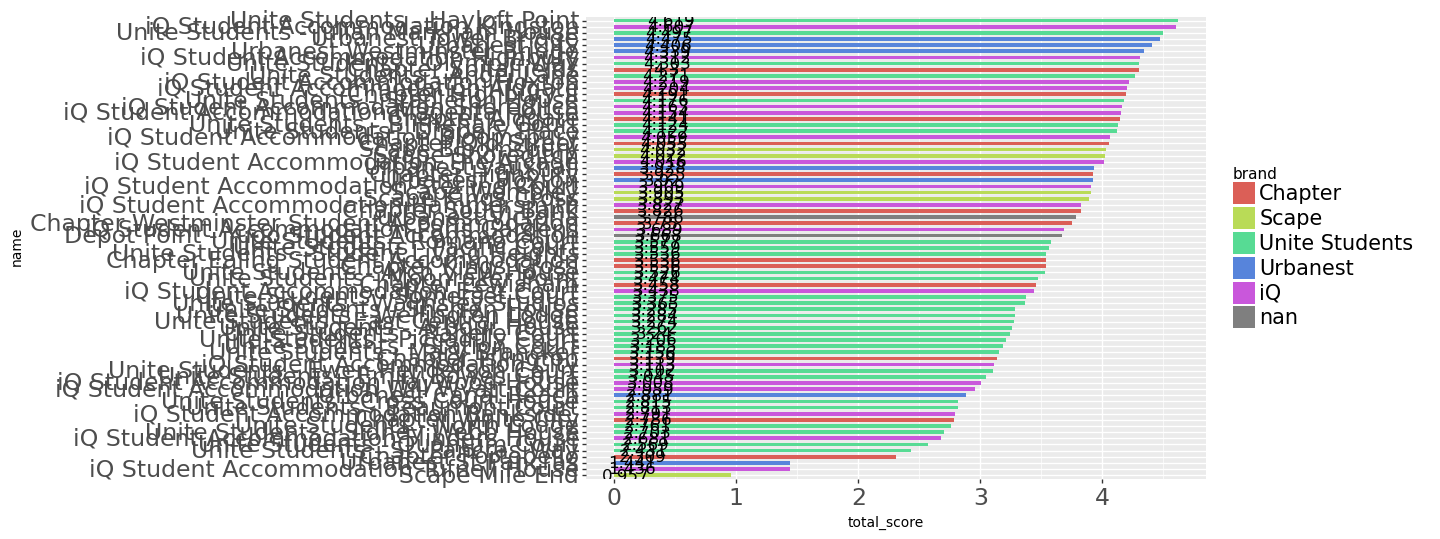

<ggplot: (112155765754)>

In [66]:
(ggplot(data=sdf,
        mapping=aes(x='name',y='total_score',fill = 'brand'))
    + geom_bar(stat = 'identity',width = 0.6)
    + coord_flip()
    +scale_x_discrete(limits=sdf['name'].tolist()[::])
    + theme(figure_size=(8,6),
            axis_text=element_text(size=17),
            axis_title=element_text(size=10),
            legend_text=element_text(size=15))
    + geom_text(aes(label='total_score'), size=12, position=position_stack(vjust=0.1)))